In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA #Principal Component Analysis(Simplifies Complex datasets by summarising huge data)
from yellowbrick.cluster import KElbowVisualizer # helps you find the best number of clusters (k) for a (k)-means clustering model.
from yellowbrick.cluster import SilhouetteVisualizer  #a tool for evaluating clustering algorithms, which visualizes the silhouette coefficient for each data point and cluster
from sklearn.metrics import davies_bouldin_score  #a metric used to evaluate the quality of a clustering result
from sklearn.metrics import silhouette_score #used for measuring cluster quality

In [72]:

def Customer_Segmentation(file):
    try:
        #  Read CSV
        data = pd.read_csv(file.name)

        #  Select numeric columns only
        numeric_data = data.select_dtypes(include=['float64', 'int64']).fillna(0)

        if numeric_data.empty:
            return "⚠️ No numeric columns found in your dataset. Please upload a file with numeric data (like Income, Spending, etc.)."

        #  Standardizing numeric features
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(numeric_data)

        #  Apply KMeans (3 clusters)
        kmeans = KMeans(n_clusters=7, random_state=42)
        clusters = kmeans.fit_predict(scaled_data)

        #  Attach cluster labels
        data['Cluster'] = clusters

        #  Count cluster members
        cluster_counts = data['Cluster'].value_counts().sort_index()
        summary = "✅ Segmentation complete!\n\n"
        summary += f"Total clusters created: **{len(cluster_counts)}**\n\n"
        summary += "Cluster distribution:\n"
        for i, count in cluster_counts.items():
            summary += f" - Cluster {i}: {count} customers\n"

        return summary

    except Exception as e:
        # This will help you see the actual cause in Gradio
        return f"❌ Error: {str(e)}"

# Step 7: Create Gradio Interface
iface = gr.Interface(
    fn=Customer_Segmentation,
    inputs=gr.File(label="Upload Bank Customer Data (CSV)"),
    outputs="text",
    title="🏦 Bank Customer Segmentation Analyzer",
    description="Upload your dataset — the model will analyze and display how many customer clusters were found."
)

In [73]:
from google.colab import files
uploaded = files.upload()

Saving Credit Card Details (1).csv to Credit Card Details (1) (3).csv


In [74]:
df = pd.read_csv('Credit Card Details (1).csv')#To read the file
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [75]:
df.info() # Provides summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [76]:
df.describe() #Provides the statistical summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [77]:
df.isna().sum() #To count the missing values in each column of the given dataframe

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [78]:
df.loc[(df['MINIMUM_PAYMENTS'].isna() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean() #It replaces all missing values in the column "MINIMUM_PAYMENTS" with the mean of the existing values in the same column(calculates the arithmetic mean of all existing values in the "MINIMUM PAYMENTS" column (mean is found by adding all the numbers and dividng it by the total count))

In [79]:
df.loc[(df['CREDIT_LIMIT'].isna() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].median()  #finds all the missing values in the 'CREDIT LIMIT' column and replaces them with the median value of that same column(median for odd numbers is taking the middle number out of the given set of numbers while median of even numbers is find the 2 middle numbers and the dividng it by 2)


In [80]:
df.drop(['CUST_ID'], axis=1, inplace=True) #It deletes the column CUST_ID from the dataset (not necessary)

In [81]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [82]:
len(df.columns)#Counts the number of columns

17

/tmp/ipython-input-4153352088.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})#For plotting in historgram format
/tmp/ipython-input-4153352088.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df

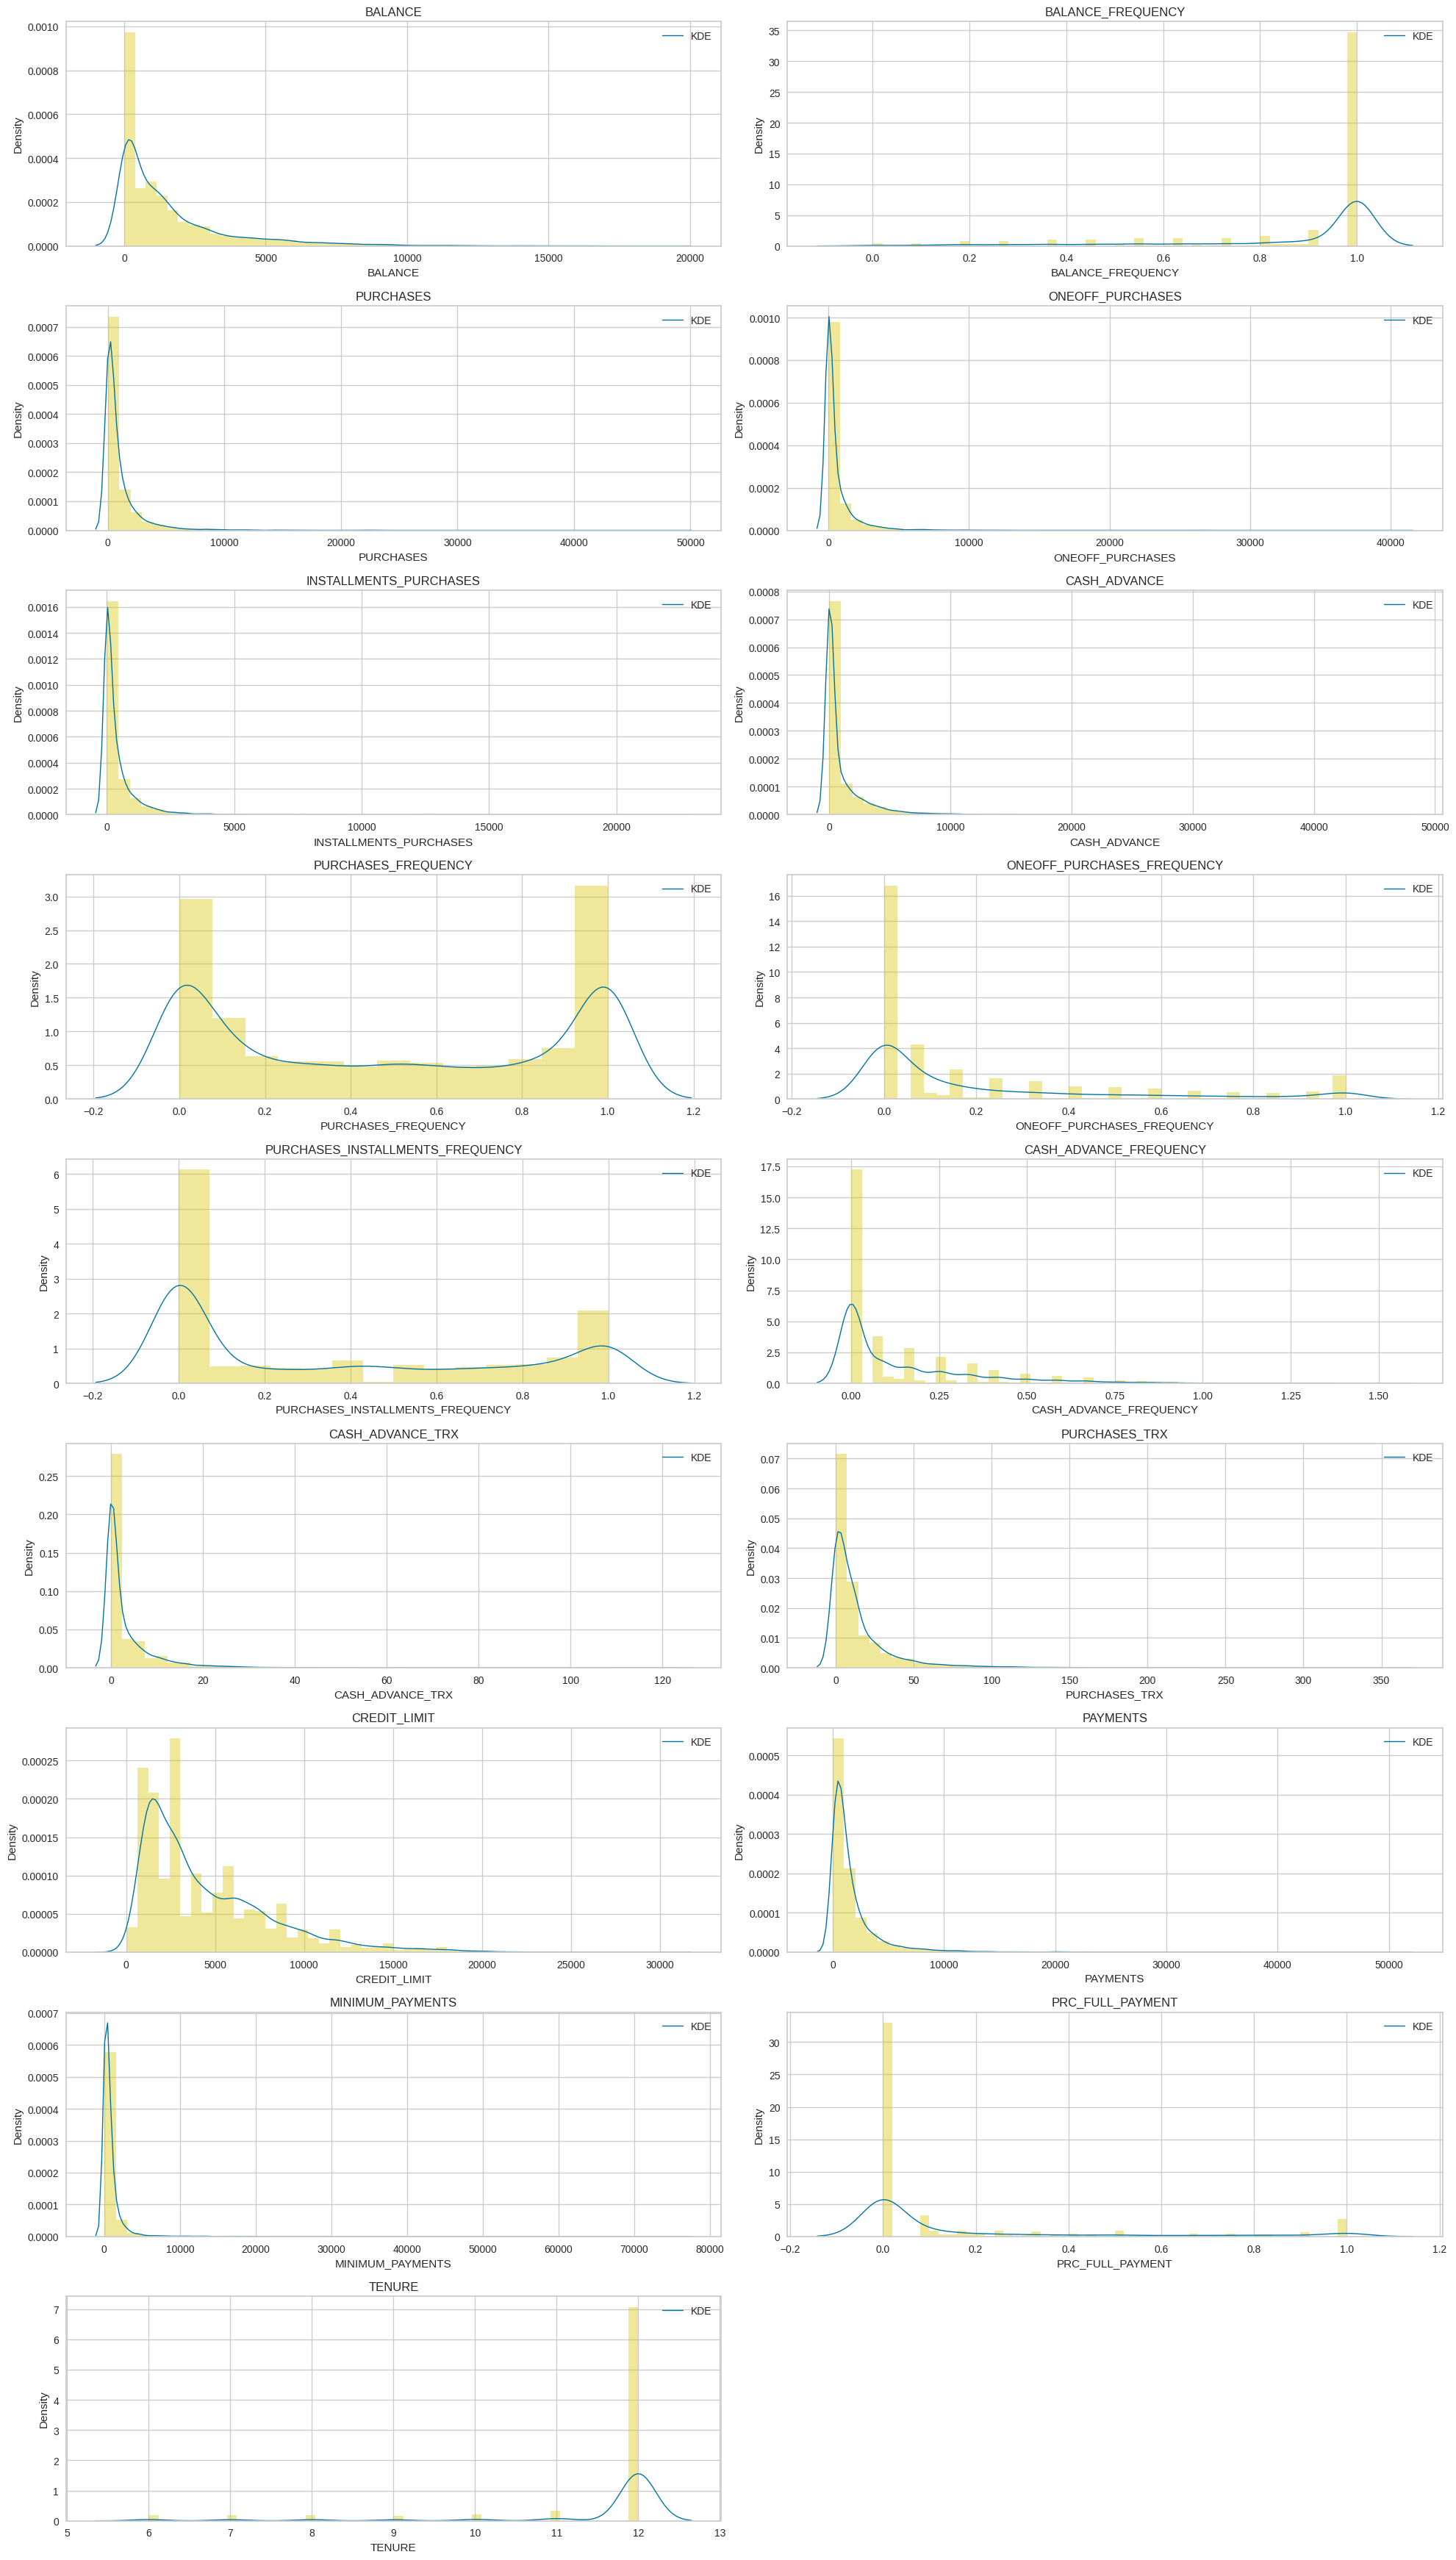

In [83]:
plt.figure(figsize=(20, 35))#For plotting
for i in range(len(df.columns)):
    plt.subplot(9, 2, i+1)#Plotting multiple plots in a single figure
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})#For plotting in historgram format
    plt.title(df.columns[i])
    plt.legend()#acts as a key to help viewers understand what each visual element represents

plt.tight_layout()#function that automatically adjusts the spacing between subplots to prevent titles, labels, and other elements from overlapping

/tmp/ipython-input-990649714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2.columns[i]], kde_kws={"color": "b", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})
/tmp/ipython-input-990649714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2.columns[i]], kde_kws={"color": 

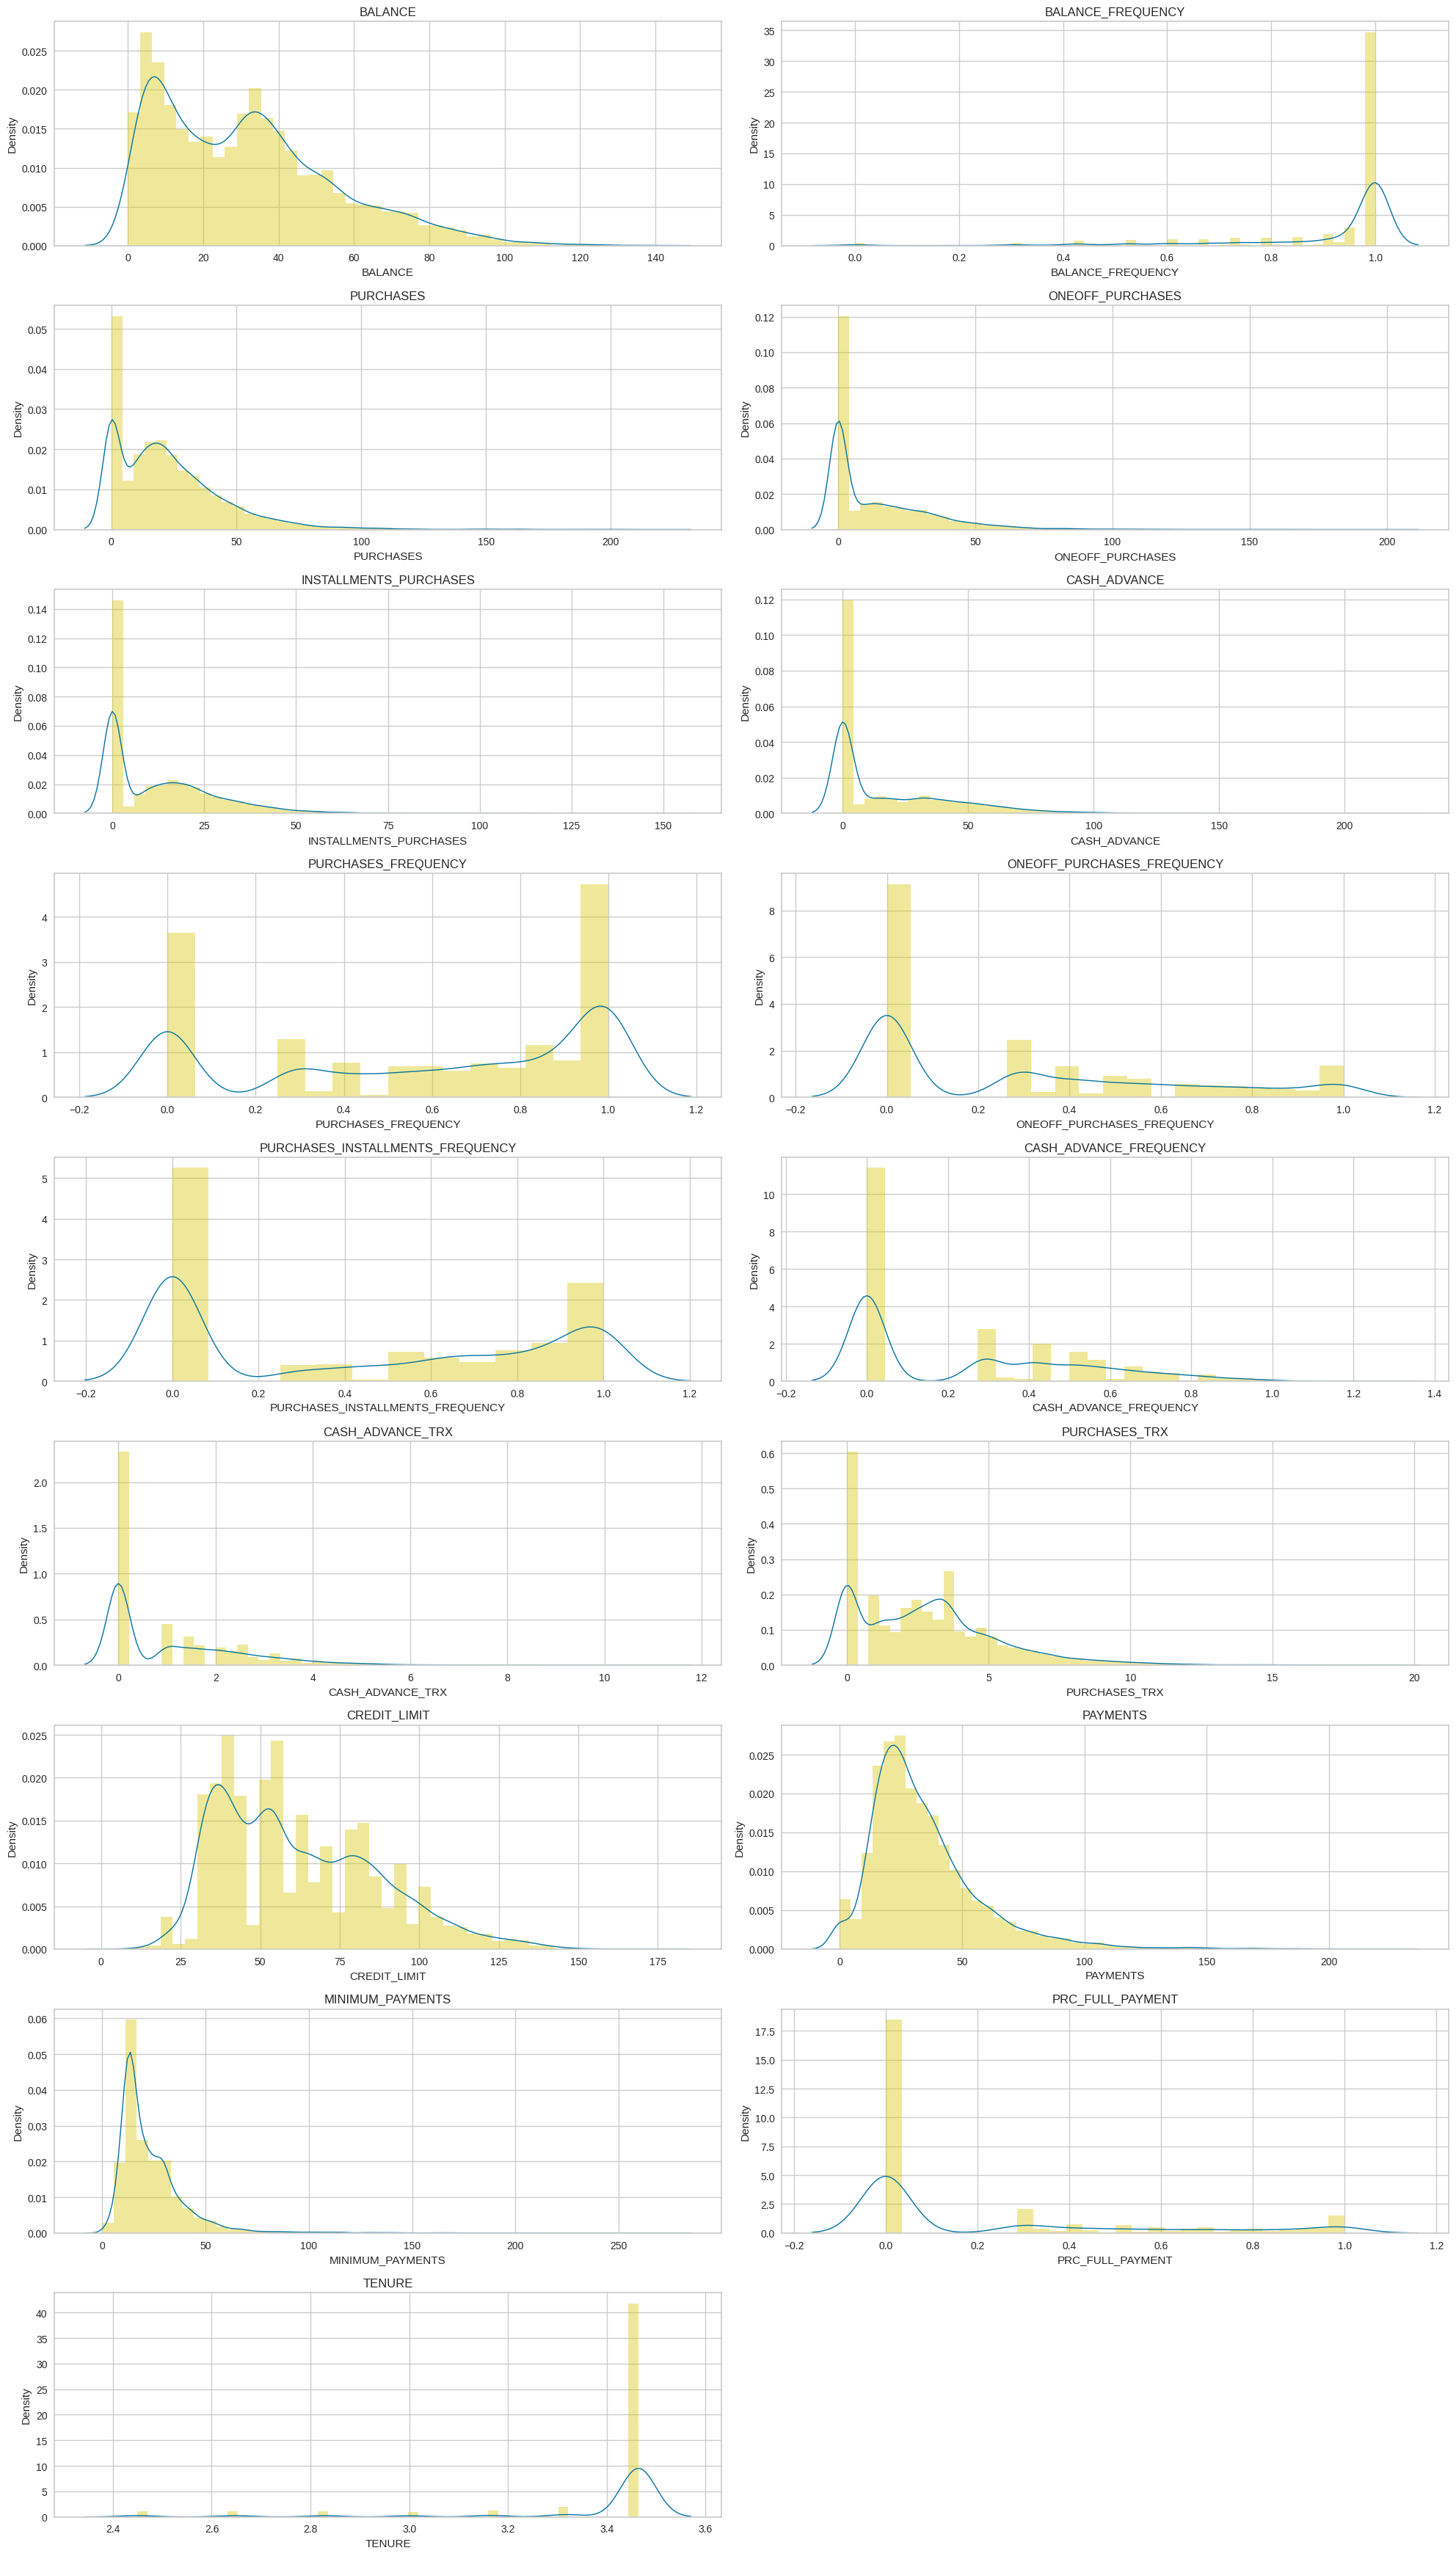

In [84]:
df2 = df.copy()

for col in df.columns:
    df2[col] = np.sqrt(df2[col])
# Plotting a distplot
plt.figure(figsize=(20, 35))
for i in range(len(df2.columns)):
    plt.subplot(9, 2, i+1)
    sns.distplot(df2[df2.columns[i]], kde_kws={"color": "b", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})
    plt.title(df2.columns[i])

plt.tight_layout()

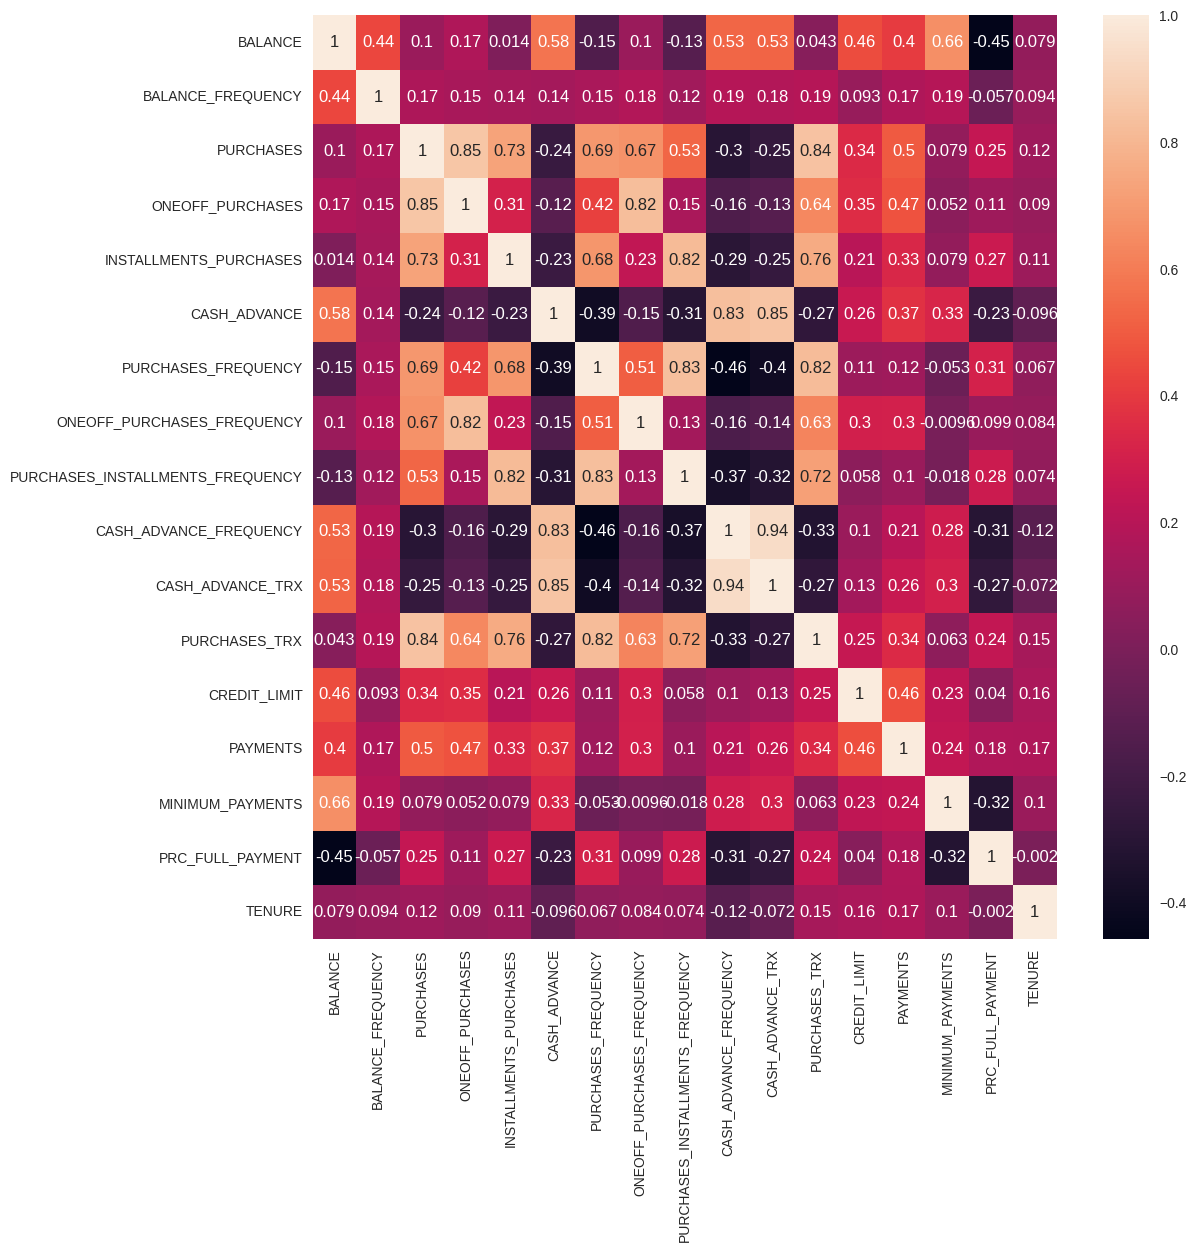

In [85]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), annot=True)#Heatmap visulization
plt.show()

In [86]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)#To standardize the data( saving to df_scaled)


In [87]:
df_scaled.shape# returns the number of rows and columns

(8950, 17)

In [88]:

df_scaled# makes the numerical values in uniform(Standardized)

array([[-1.0780545 , -0.09712559, -0.59690132, ..., -0.66790184,
        -0.63618182,  0.35348056],
       [ 1.05361908,  0.19053935, -1.0423371 , ...,  0.52254404,
         0.78887411,  0.35348056],
       [ 0.77167992,  0.46414608,  0.22574803, ...,  0.08464159,
        -0.63618182,  0.35348056],
       ...,
       [-1.14422589, -0.04811222, -0.49431949, ..., -0.82330785,
         0.87531901, -4.27612743],
       [-1.19386072, -0.04811222, -1.0423371 , ..., -0.91494252,
         0.87531901, -4.27612743],
       [-0.52978249, -0.61472285,  0.46555636, ..., -0.8052387 ,
        -0.63618182, -4.27612743]])

In [89]:
pca = PCA(n_components=2, random_state=12)#makes your dataset into 2 dimensional(making it easier to visualize, analyze, and process)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = principal_components, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.885217,-2.482969
1,-3.000240,2.015255
2,1.191773,0.385186
3,-0.794760,0.218509
4,-1.265122,-1.593251


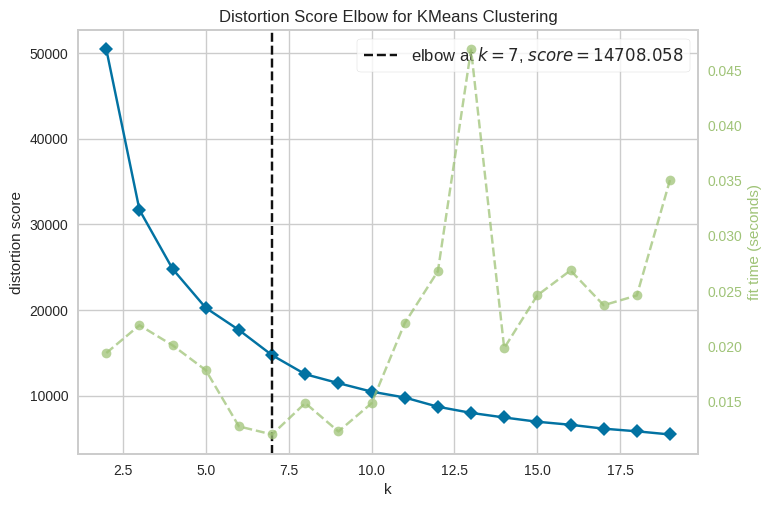

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,20))

distortion_visualizer.fit(pca_df)
distortion_visualizer.show()

In [91]:
kmeans = KMeans(n_clusters=distortion_visualizer.elbow_value_, random_state=12)
kmeans.fit(pca_df)
labels=kmeans.labels_

In [92]:
clusters=pd.concat([df, pd.DataFrame({'Cluster':labels})], axis=1)#Creates a new column clusters and adds it to the dataset and displays the first 5 rows
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


<Axes: xlabel='Cluster', ylabel='count'>

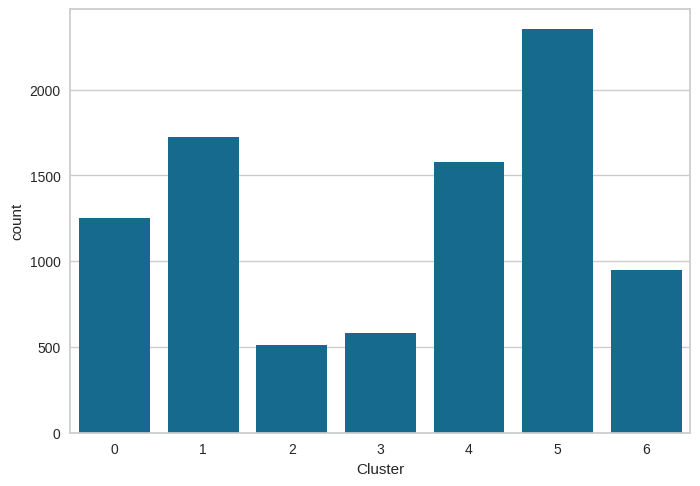

In [93]:
sns.countplot(x="Cluster", data=clusters)#counts which clusters and how many present for each clusters and plots accordingly

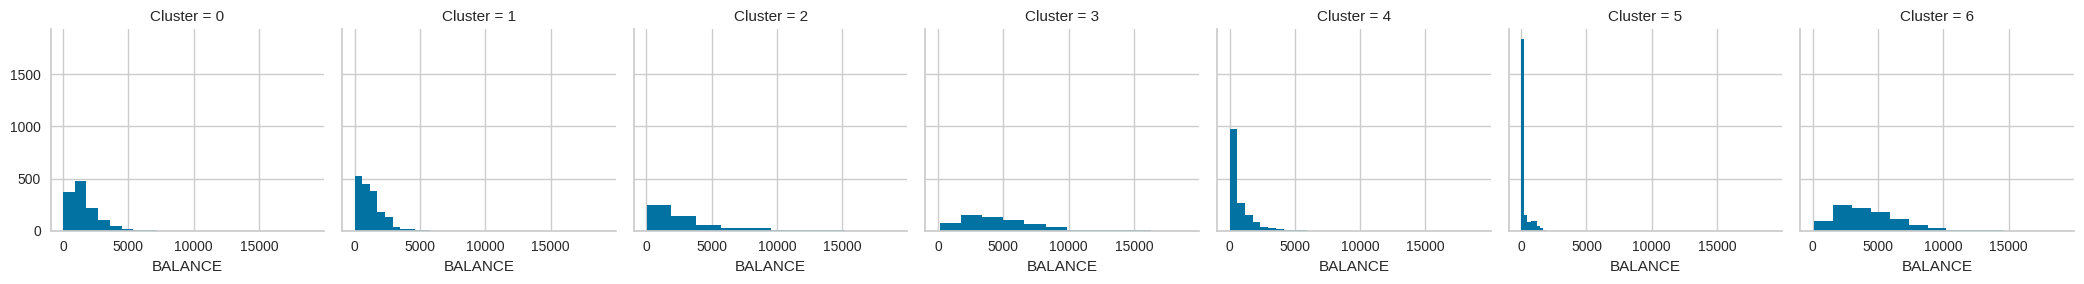

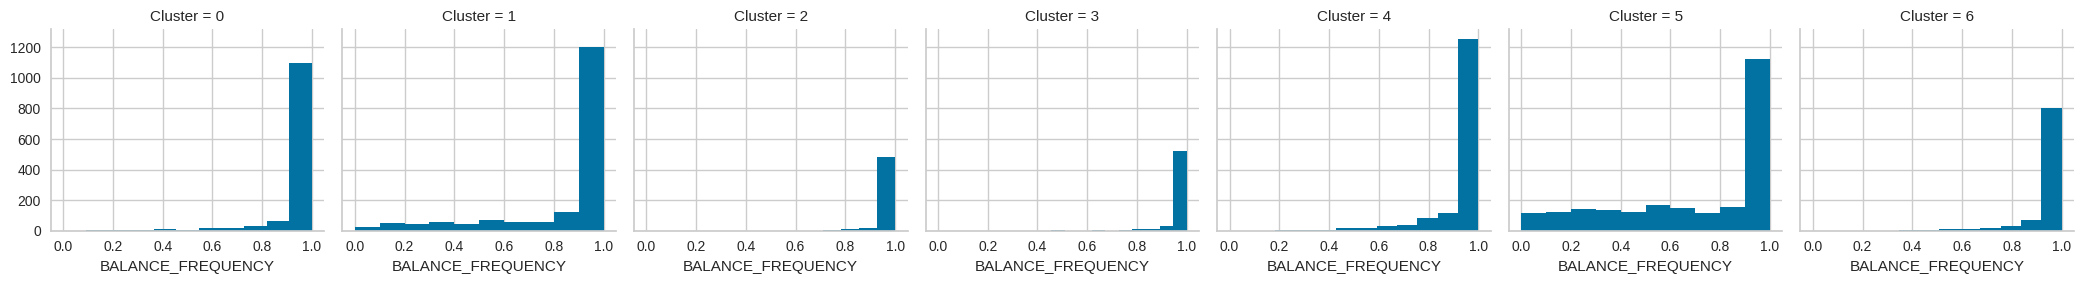

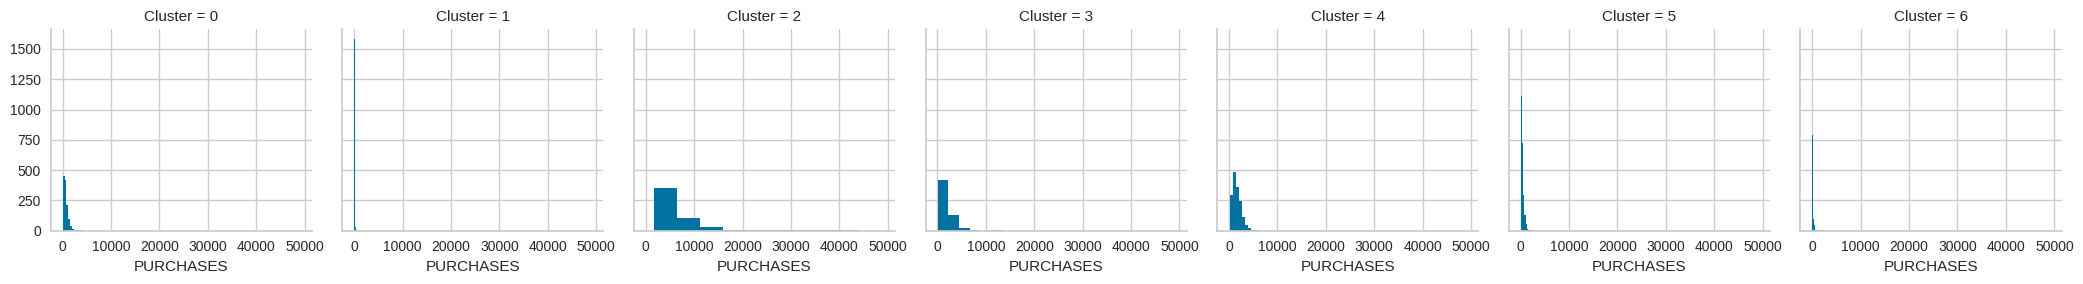

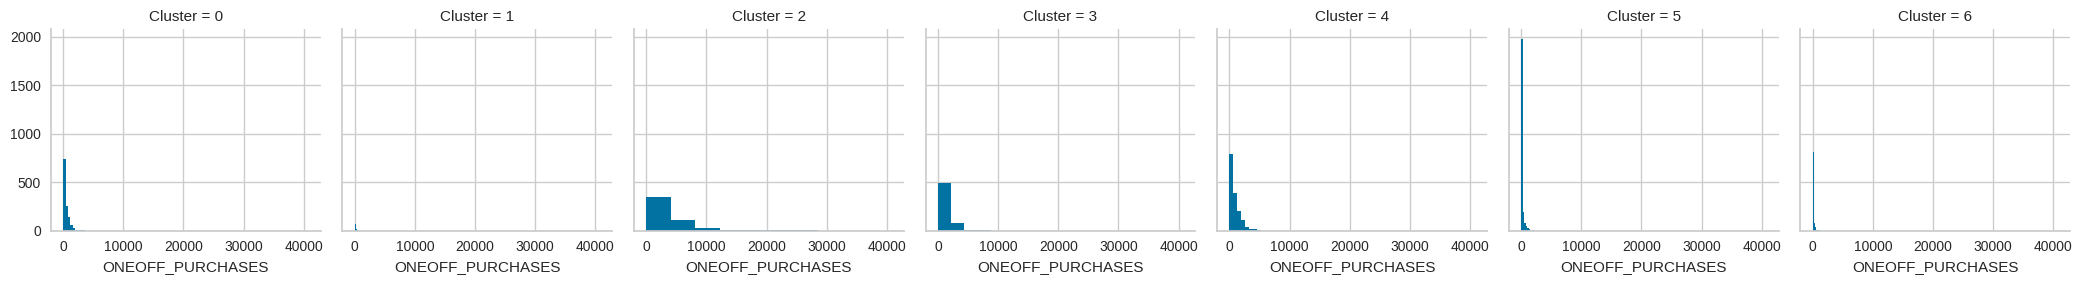

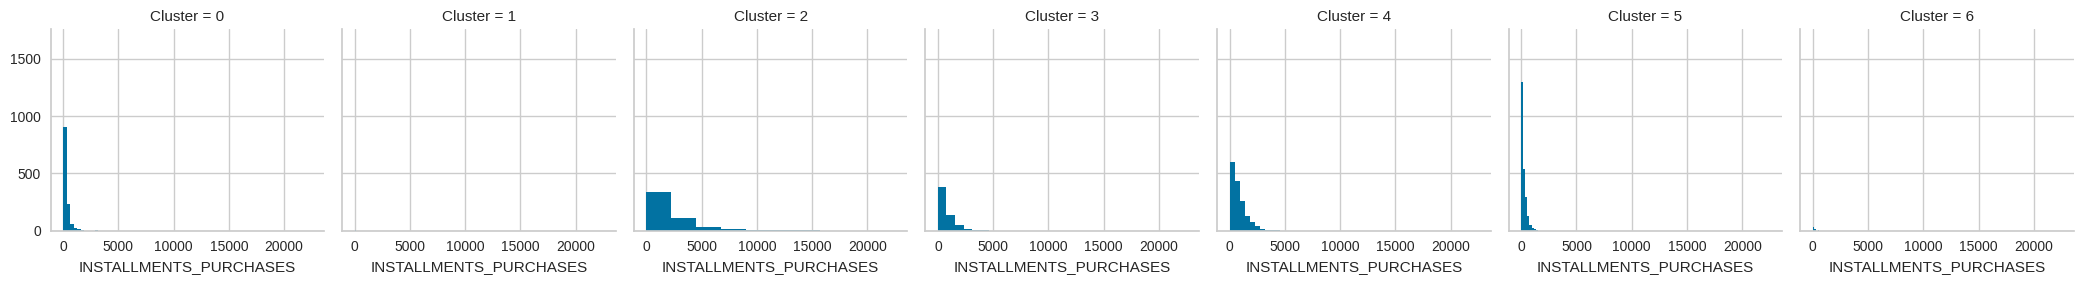

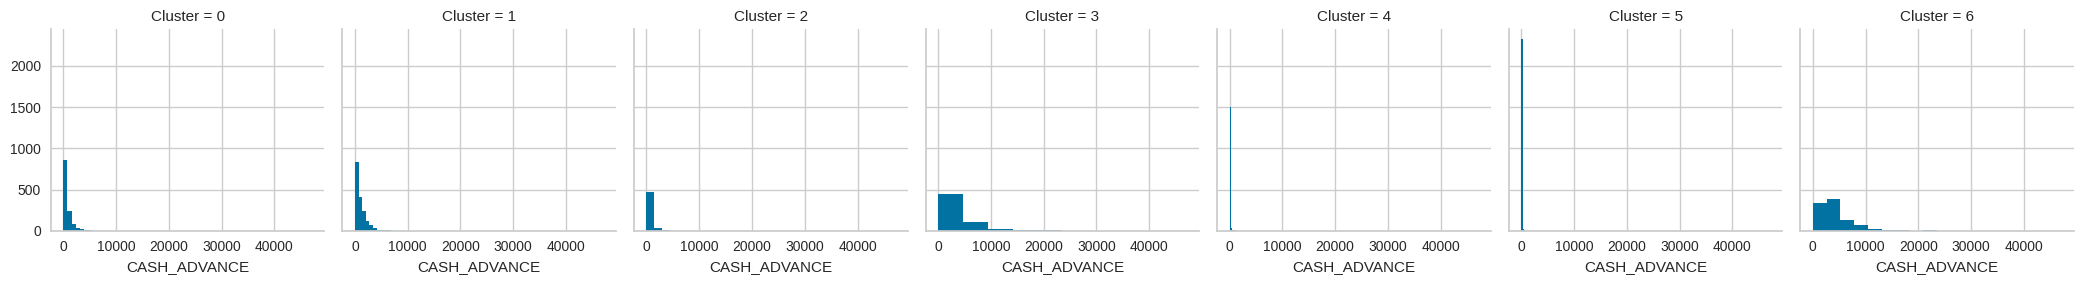

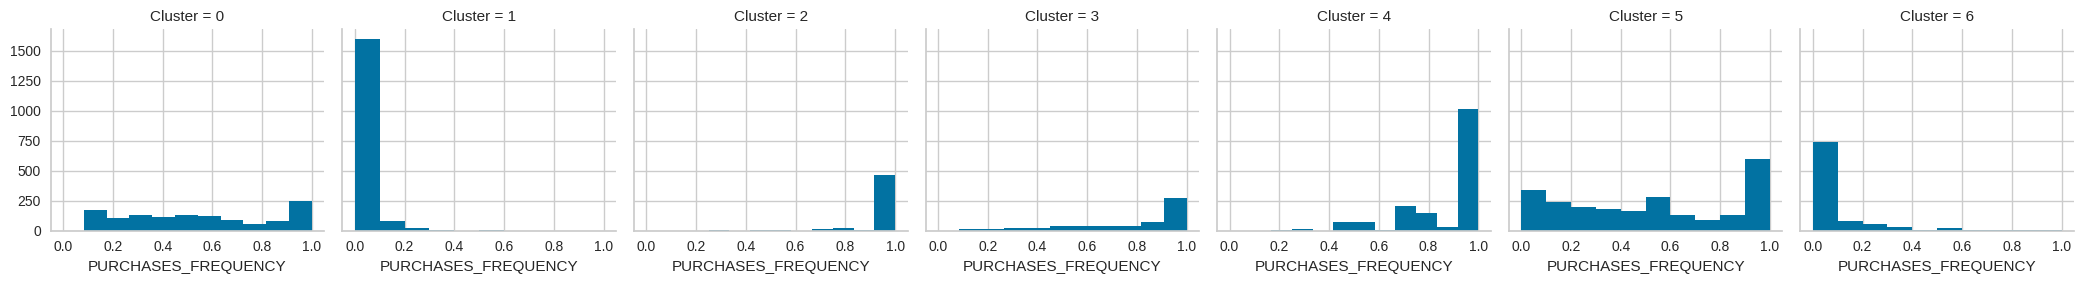

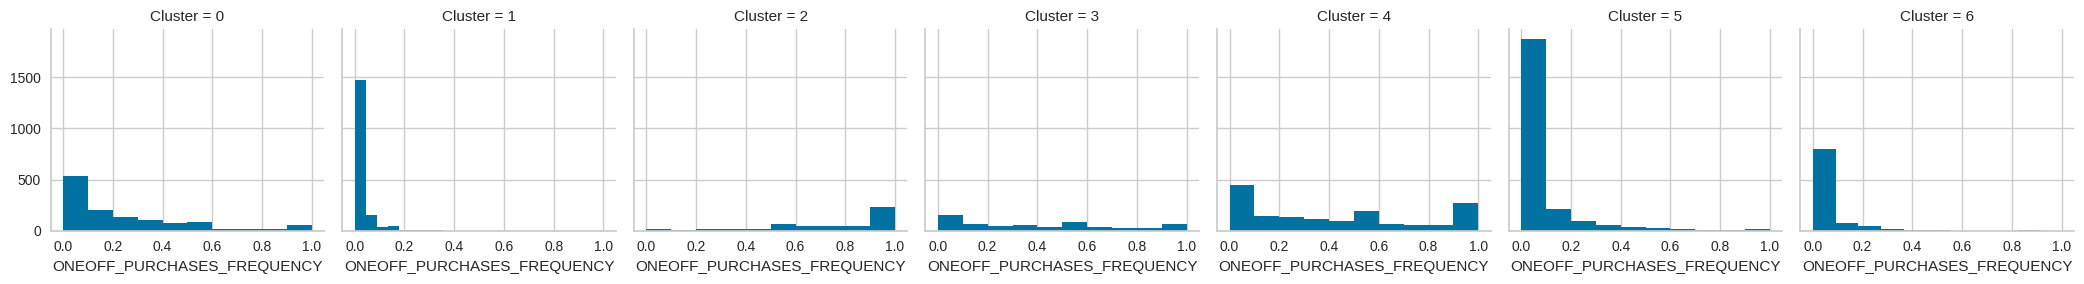

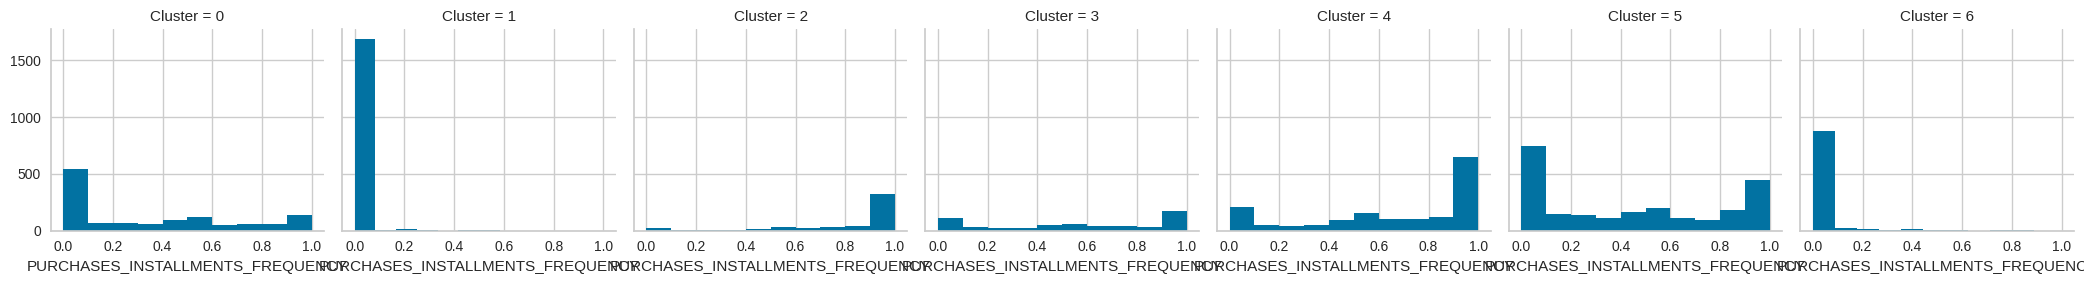

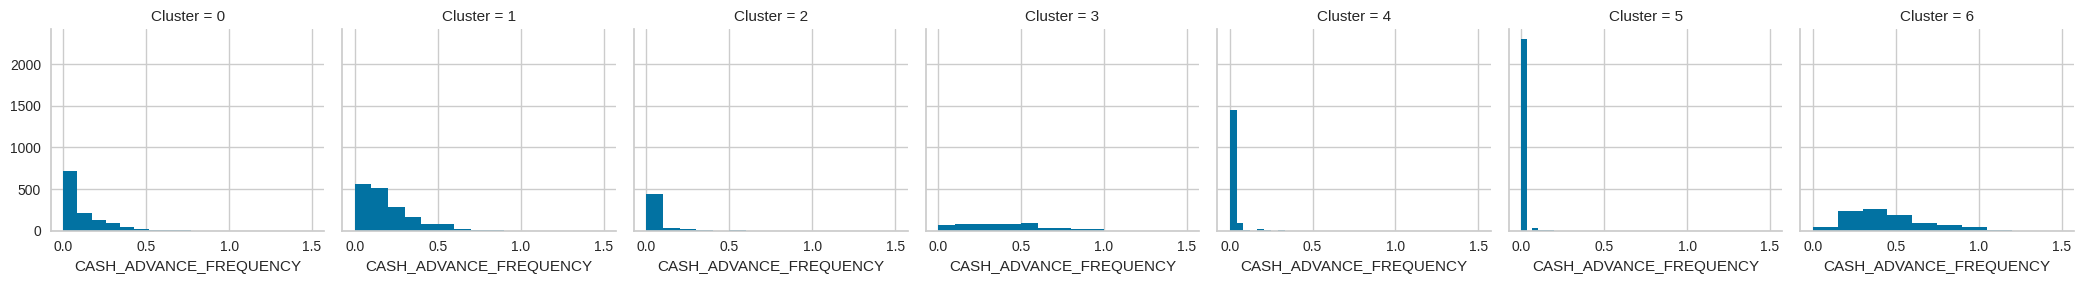

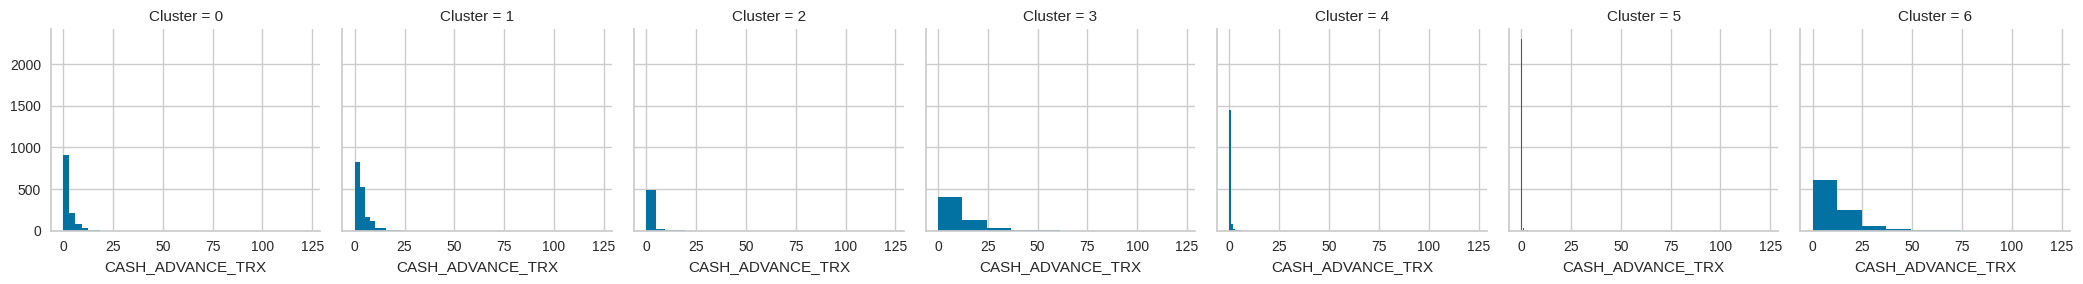

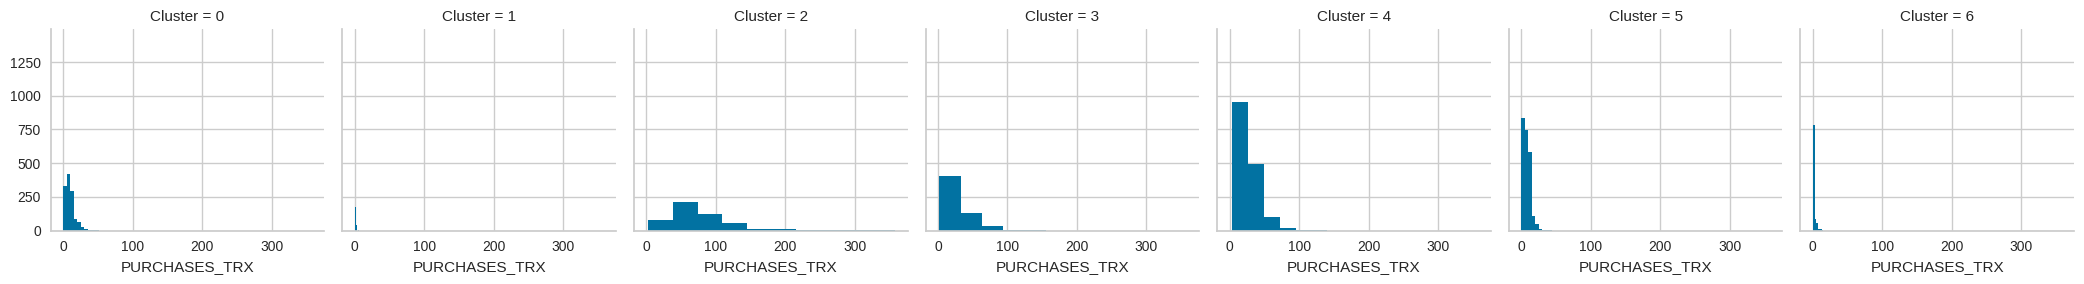

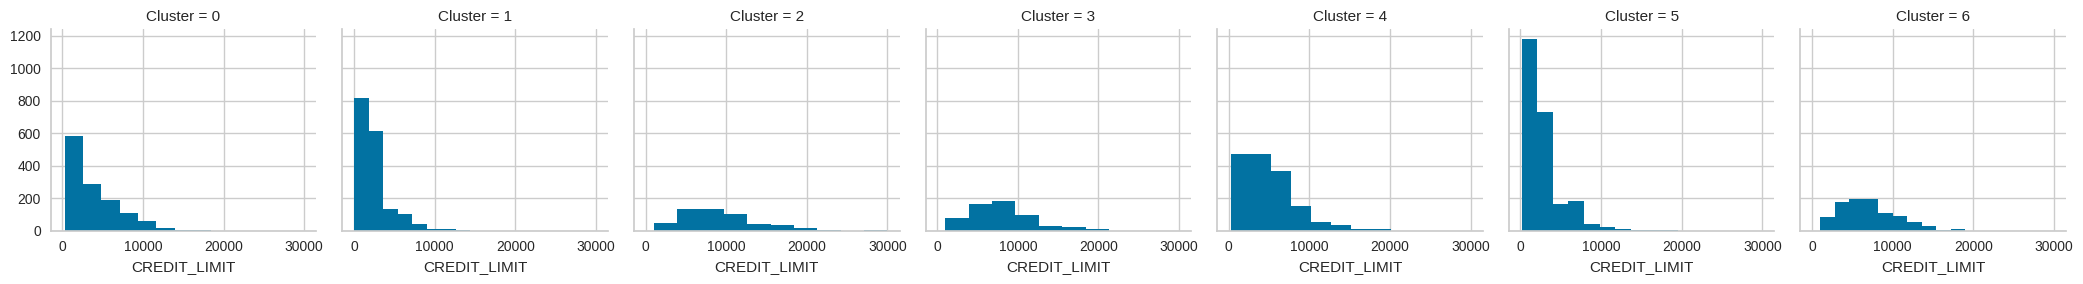

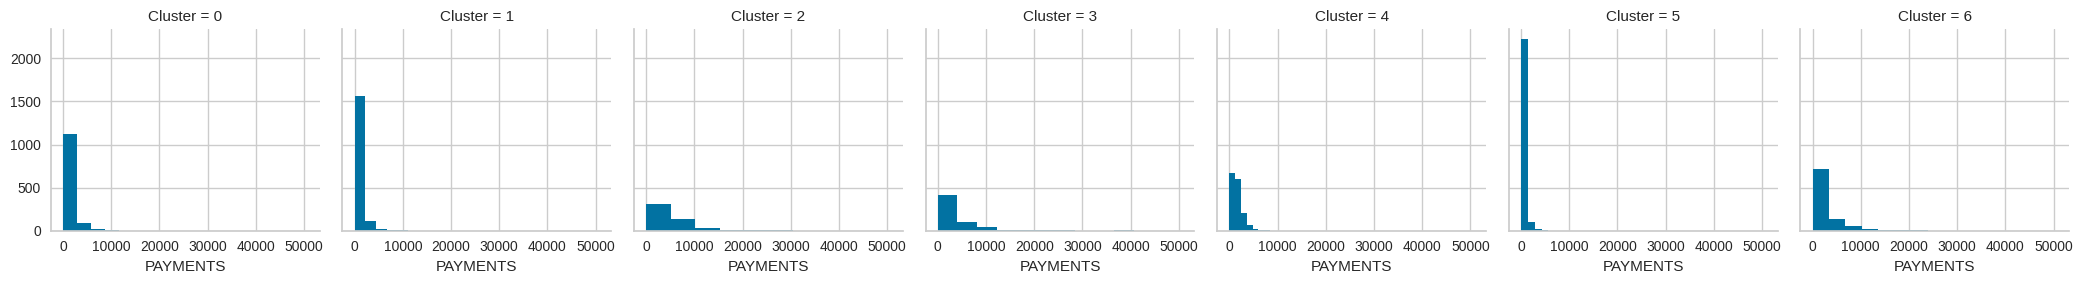

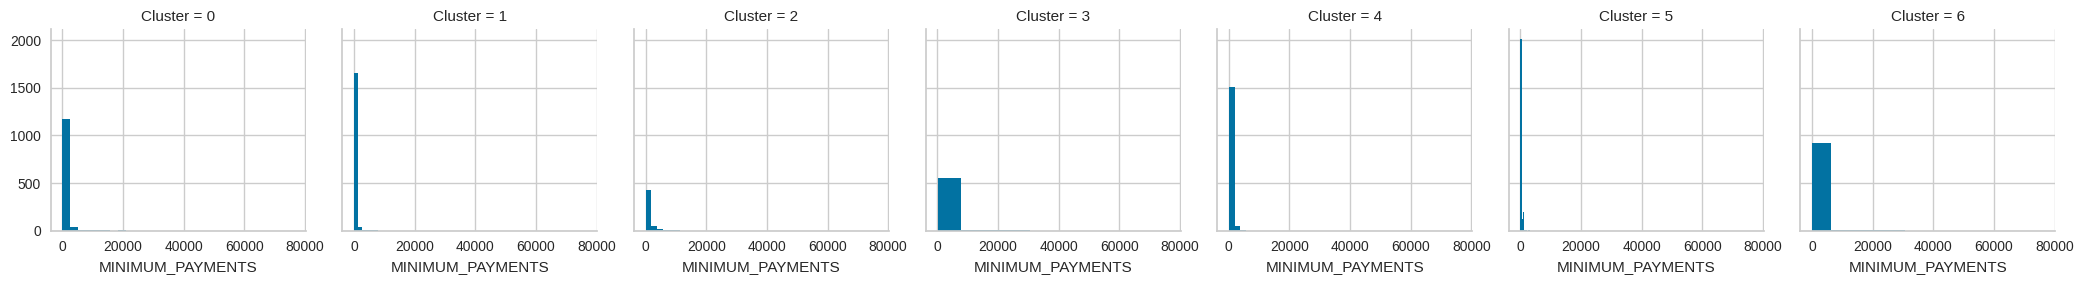

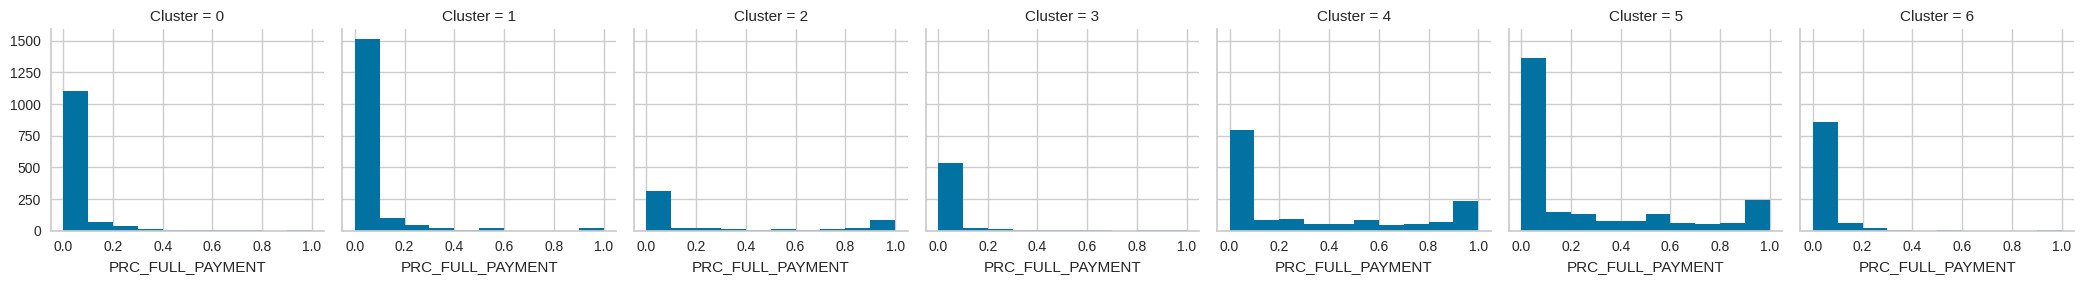

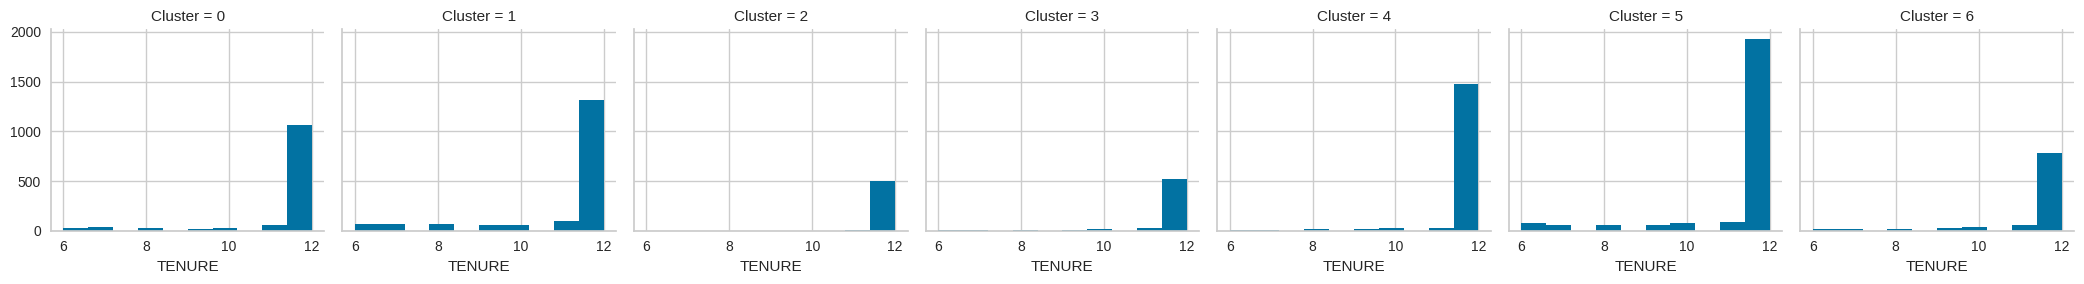

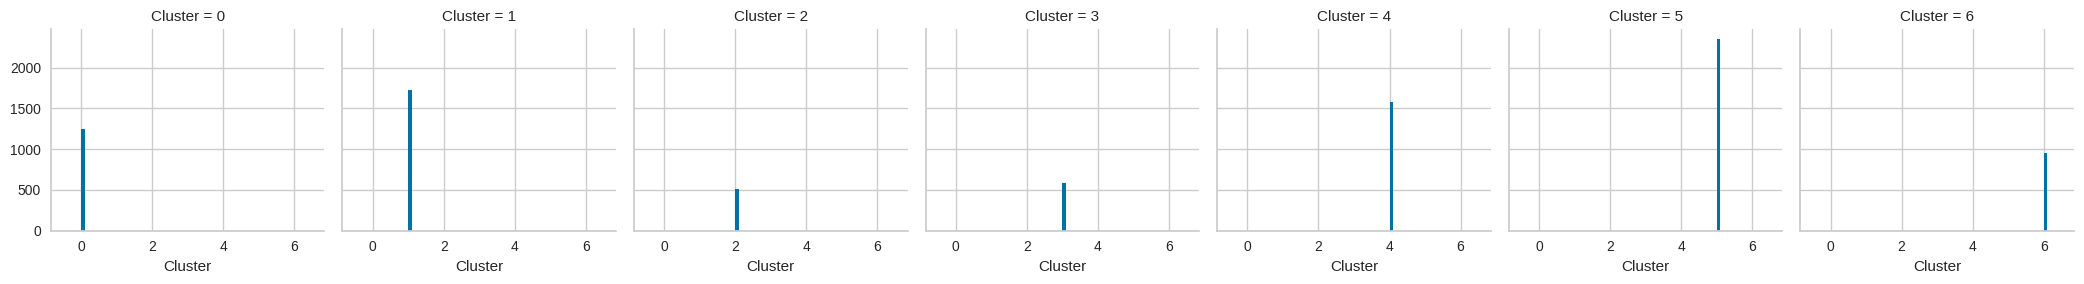

In [94]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='Cluster')
    grid.map(plt.hist, c)

In [95]:

clusters2= pd.concat([df2, pd.DataFrame({'Cluster':labels})], axis=1)

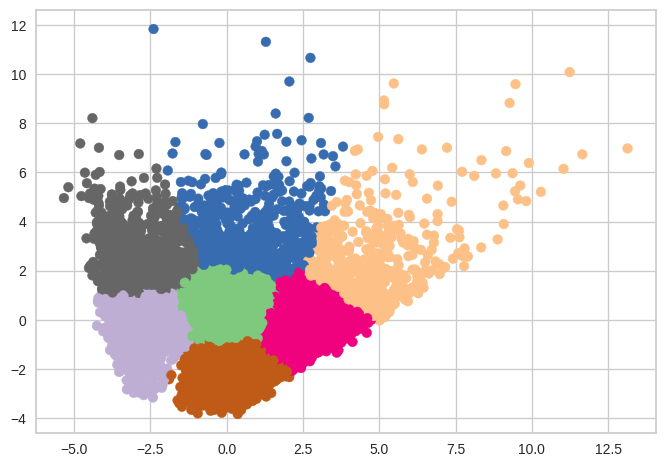

In [96]:
pca_clusters=pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis=1)
plt.scatter(pca_clusters['pca1'], pca_clusters['pca2'], c = labels, cmap =plt.cm.Accent)
plt.show()

In [97]:
print(f'Davies-Bouldin index = {davies_bouldin_score(pca_df, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_df, labels)}')

Davies-Bouldin index = 0.7979480394218017
Silhouette Score = 0.3924515698243649


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


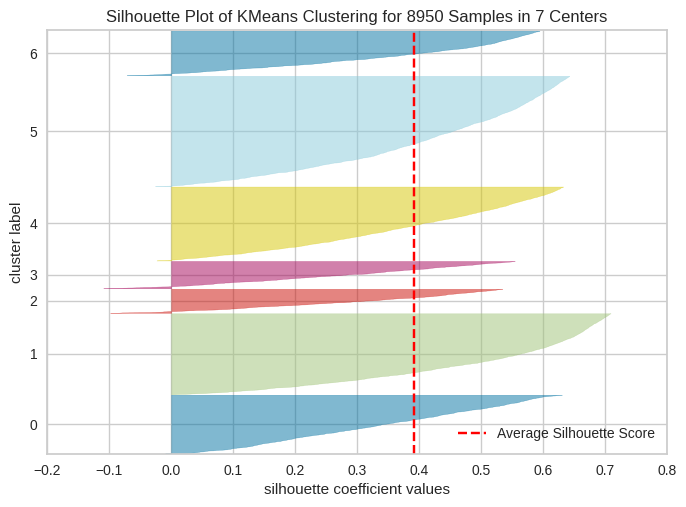

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [98]:
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis=1)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_df.drop(['Cluster'],axis=1))
visualizer.show()

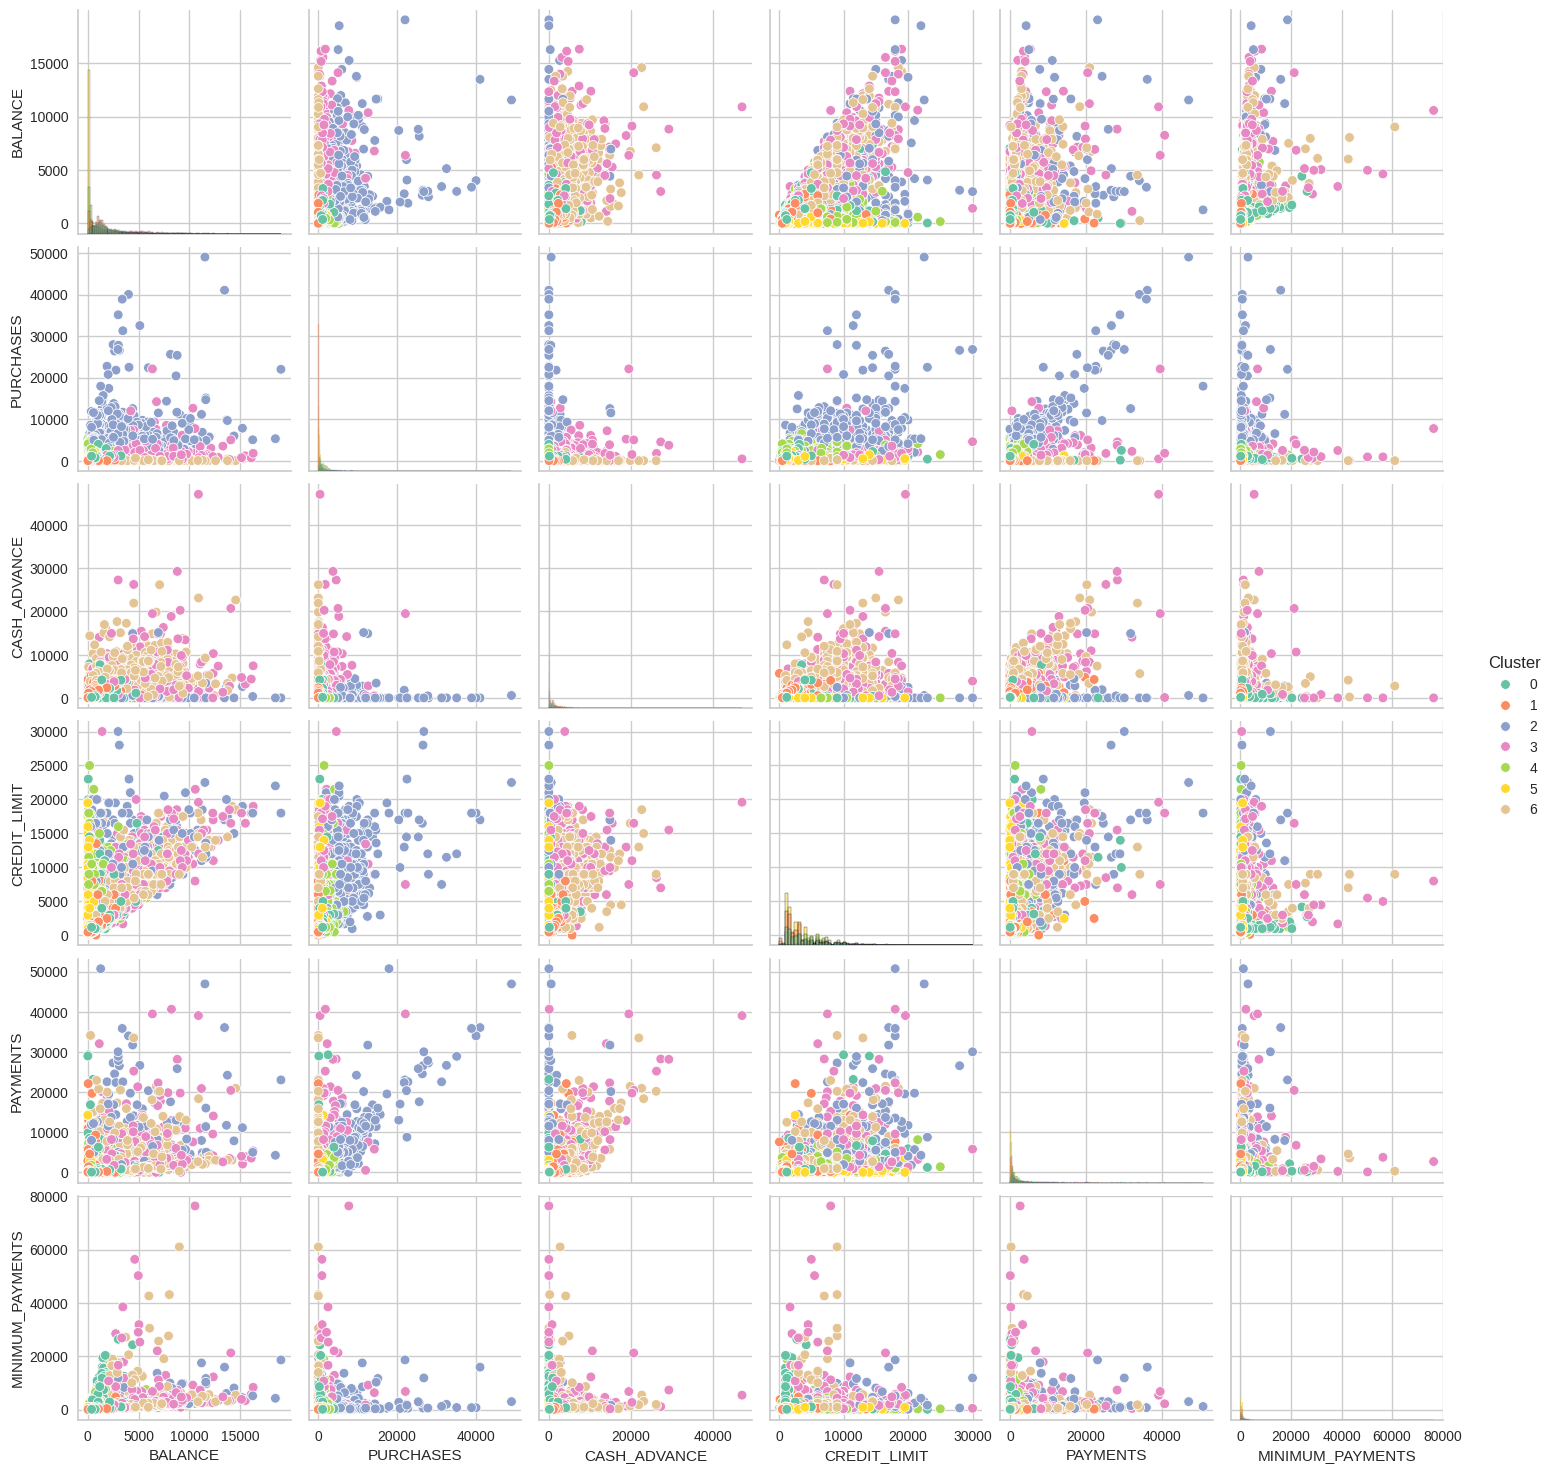

In [99]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", 'Cluster']
sns.pairplot( clusters[ best_cols ], hue="Cluster", palette='Set2', diag_kind="hist")

In [100]:
analysis_cluster = clusters.groupby('Cluster').apply(lambda x: x.mean()).T
analysis_cluster

/tmp/ipython-input-3868076410.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  analysis_cluster = clusters.groupby('Cluster').apply(lambda x: x.mean()).T


Cluster,0,1,2,3,4,5,6
BALANCE,1591.362557,1176.465081,2983.371224,4720.103741,745.919516,213.271987,4231.179502
BALANCE_FREQUENCY,0.957128,0.854371,0.989202,0.983595,0.952147,0.714277,0.967169
PURCHASES,675.924884,22.927028,6638.201793,1907.946690,1682.668174,352.020995,100.926940
ONEOFF_PURCHASES,449.022482,20.267121,4348.743353,1193.693139,886.235257,127.274419,87.130116
INSTALLMENTS_PURCHASES,227.480376,2.671495,2290.628031,714.253551,796.515092,225.220196,13.903733
CASH_ADVANCE,617.726402,1019.686558,324.879667,3638.256009,27.428350,6.671640,4082.724633
PURCHASES_FREQUENCY,0.548883,0.023936,0.965308,0.778314,0.882894,0.530195,0.077809
ONEOFF_PURCHASES_FREQUENCY,0.232897,0.017050,0.747262,0.394916,0.412942,0.076573,0.049279
PURCHASES_INSTALLMENTS_FREQUENCY,0.329947,0.006124,0.821321,0.564261,0.663949,0.432476,0.026223
CASH_ADVANCE_FREQUENCY,0.130686,0.207354,0.043889,0.382008,0.009653,0.002338,0.444244


In [101]:
clusters['Cluster'].value_counts() #Counts the number of each type of clusters

,count
Cluster,
5,2351
1,1726
4,1577
0,1249
6,951
3,583
2,513


In [102]:
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://52951bbab7a7855063.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
